# Learning outcomes
1. Classifier: k Nearest Neigbor classifier (kNN)
2. Feature extraction method: Histogram of gradients (HOG)
3. Demo on how to apply machine learning technique in image classification

## Setup

In [1]:
import sys
sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import os    # filepath manipulation
import matplotlib.pyplot as plt

## How kNN works?

The prediction: [[1.]]
The labels of 3 neighbors: [[1. 1. 1.]]
The squared distances: [[245. 290. 305.]]


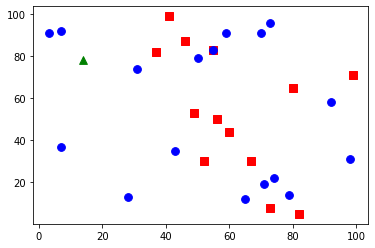

In [9]:
np.random.seed(40)

# create simple data: biviarate data (integer) x and y generated randomly from 0 to 99.
# create labels: span[0, 1]: binary class problem
train_data = np.random.randint(0, 100, (30, 2)).astype(np.float32)
targets = np.random.randint(0, 2, (30, 1)).astype(np.float32)

# subset the data with target 0
datA = train_data[targets.ravel() == 0]
plt.scatter(datA[:, 0], datA[:, 1], s=60, c="r", marker="s")

# subset the data with target 1
datB = train_data[targets.ravel() == 1]
plt.scatter(datB[:, 0], datB[:, 1], s=60, c="b", marker="o")

# create a new data(query data)
new_data = np.random.randint(0, 100, (1,2)).astype(np.float32)
plt.scatter(new_data[:, 0], new_data[:, 1], s=60, c="g", marker="^")

# create kNN: the purpose is to predict the label of new data
knn = cv.ml.KNearest_create()
knn.train(train_data, cv.ml.ROW_SAMPLE, targets)
ret, pred, labels_neigh, sq_dist = knn.findNearest(new_data, 3)

print(f"The prediction: {pred}")
print(f"The labels of 3 neighbors: {labels_neigh}")
print(f"The squared distances: {sq_dist}")

plt.show()


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate
knn = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
knn.fit(train_data, targets.flatten())
print(f"the prediction: {knn.predict(new_data)}")

the prediction: [1.]


In [13]:
knn.kneighbors(new_data)

(array([[15.65247584, 17.02938637, 17.4642492 ]]),
 array([[28, 15,  5]], dtype=int64))

In [15]:
dist, idx_neigh = knn.kneighbors(new_data)

targets[idx_neigh]

array([[[1.],
        [1.],
        [1.]]], dtype=float32)

In [16]:
sys.path

['C:\\Users\\User\\Downloads\\Mini Project\\UCCC2513_code',
 'C:\\Users\\User\\anaconda3\\python39.zip',
 'C:\\Users\\User\\anaconda3\\DLLs',
 'C:\\Users\\User\\anaconda3\\lib',
 'C:\\Users\\User\\anaconda3',
 '',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\Pythonwin']

In [18]:
sys.path.insert(1, "C:/Users/User/Downloads/Mini Project/UCCC2513_code/fashion-mnist-master/utils")

In [19]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('./fashion-mnist-master/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('./fashion-mnist-master/data/fashion', kind='t10k')

In [20]:
# check the dimensionality
X_train.shape

(60000, 784)

In [21]:
X_train.dtype

dtype('uint8')

In [22]:
28*28

784

In [25]:
class_labels = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

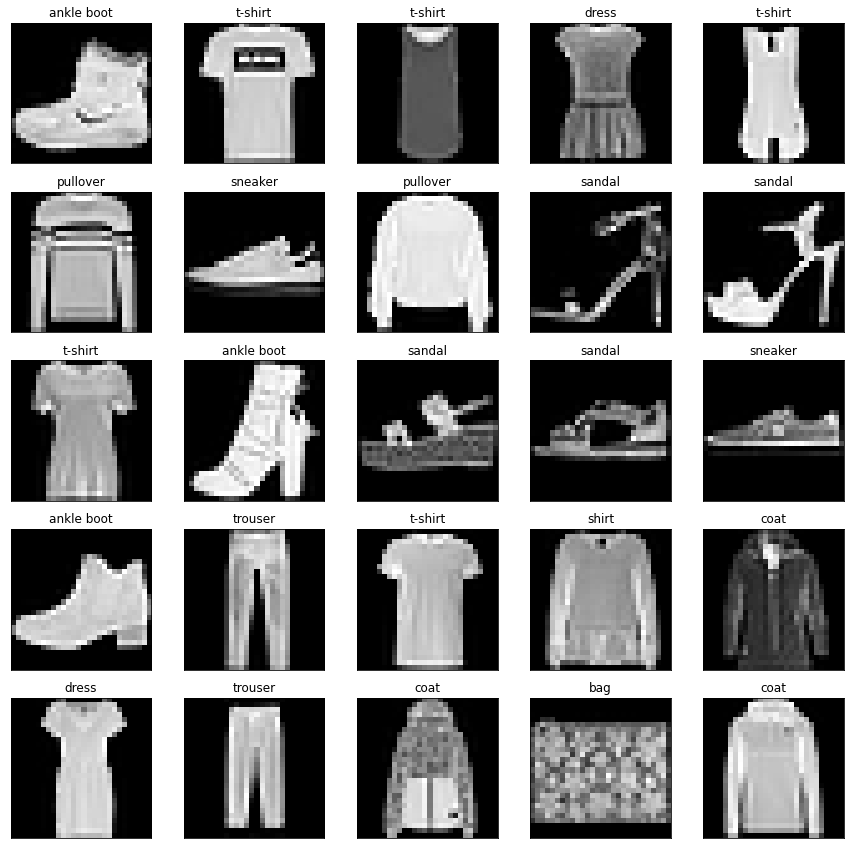

In [26]:
# visualize train data
plt.figure(figsize =(15,15))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks([]), plt.yticks([])
    plt.title(class_labels[y_train[i]])
    
plt.show()

In [28]:
# random sampling
np.random.seed(300)
shuffle_idx = np.random.permutation(len(X_train)) #shuffle the number
n_sample = int(0.1*len(X_train))
X_train_part = X_train[shuffle_idx[:n_sample]]
y_train_part = y_train[shuffle_idx[:n_sample]]

In [29]:
y_train_part[:20]

array([8, 4, 9, 4, 0, 4, 4, 6, 1, 6, 8, 2, 8, 3, 9, 5, 9, 0, 0, 7],
      dtype=uint8)

In [32]:
from sklearn.model_selection import cross_val_score # perform k-fold CV

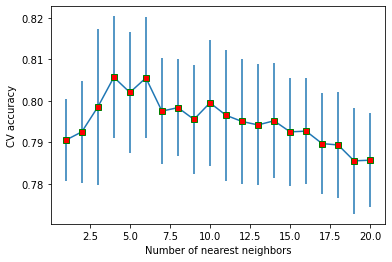

In [34]:
# perform k_fold cV on all the k that we selected
k_list = np.arange(1, 21)

mean_acc = []
std_acc = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, X_train_part, y_train_part) #5  accuracy
    mean_acc.append(scores.mean()) 
    std_acc.append(scores.std())
    
# plot the mean accuracy
plt.errorbar(k_list, mean_acc, std_acc, marker="s", mfc = "r", mec="g")
plt.xlabel("Number of nearest neighbors")
plt.ylabel("CV accuracy")
plt.show()

In [35]:
k_opt = k_list[np.argmax(mean_acc)]
k_opt

4

In [36]:
import time

In [39]:
# retrain and produce prediction
# make use of all the training data

start = time.time()
knn = KNeighborsClassifier(n_neighbors=k_opt, n_jobs=-1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f"The runtime for training and prediction of kNN: {(time.time() -start):.3f}s.")

The runtime for training and prediction of kNN: 54.240s.


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [41]:
print(classification_report(y_test, pred, target_names=class_labels))

              precision    recall  f1-score   support

     t-shirt       0.75      0.89      0.81      1000
     trouser       0.99      0.97      0.98      1000
    pullover       0.71      0.83      0.76      1000
       dress       0.90      0.87      0.89      1000
        coat       0.80      0.74      0.77      1000
      sandal       0.99      0.85      0.92      1000
       shirt       0.68      0.55      0.60      1000
     sneaker       0.88      0.97      0.93      1000
         bag       0.98      0.95      0.97      1000
  ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



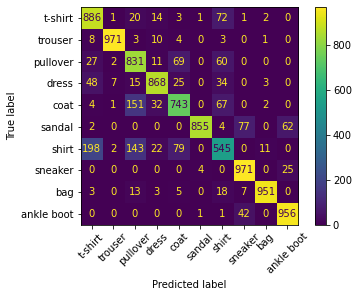

In [42]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                         display_labels=class_labels)

conf_mat_display.plot()
plt.xticks(rotation=45)
plt.show()

In [46]:
conf_mat[:, -4].sum()

804

In [47]:
545 / 804 # precision = recall / total predicted value 

0.677860696517413

In [48]:
np.diag(conf_mat).sum() / len(y_test) #drag the diagonal of the graph - accuracy

0.8577

## use real world data: binary classification problem (cats vs dogs)

In [49]:
# load data and preprocess (resizing)
class dataPreprocessor:
    def __init__(self, width, height, inter=cv.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter
    
    def process(self, img):
        return cv.resize(img, (self.width, self.height), interpolation=self.inter)
    

In [54]:
# input the image paths: images and their labels in numpy array
class dataLoader:
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        
        if self.preprocessor is None:
            self.preprocessor = []
            
    def load(self, imgPath):
        data = []
        labels = []
        
        for imgName in os.listdir(imgPath):
            filePath = os.path.join(imgPath, imgName)
            img = cv.imread(cv.samples.findFile(filePath))
            label = imgName.split(".")[0]
            
            if self.preprocessor is not None:
                for p in self.preprocessor:
                    img = p.process(img)
            
            data.append(img)
            labels.append(label)
            
        return np.array(data), np.array(labels)

In [55]:
#os.listdir("./images/cats_vs_dogs_small")

# instantiate the processor and loader
dataPrep = dataPreprocessor(64, 64)
dataLoad = dataLoader(preprocessor=[dataPrep])
X, y = dataLoad.load("./images/cats_vs_dogs_small")

In [56]:
X.shape

(3000, 64, 64, 3)

3000 color images consisting of cats or dogs

In [57]:
np.unique(y, return_counts=True)

(array(['cat', 'dog'], dtype='<U3'), array([1500, 1500], dtype=int64))

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Partition the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=500, random_state=100) 
# stratify means take the ratio in consideration, 1500 cats, 1500 dogs, 
# split into 1250 cats and 1250 dogs train, 250 cats, 250 dogs test

In [60]:
X_train.shape

(2500, 64, 64, 3)

In [62]:
# Extract HOG
winSize = (28, 28)
blockSize = (14, 14)
blockStride = (7, 7)
cellSize = (7, 7)
nbins = 9
derivAperture = 1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradients = False

hog = cv.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture,
                      winSigma, histogramNormType, L2HysThreshold, gammaCorrection,
                      nlevels, signedGradients)

In [63]:
from sklearn.preprocessing import MinMaxScaler

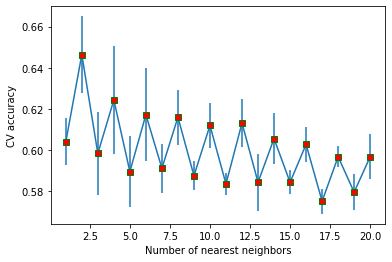

In [66]:
# perform feature extraction and scaling
X_train_hog = [hog.compute(x) for x in X_train]
X_train_hog = np.array(X_train_hog)
# scaling
scaler = MinMaxScaler()
X_train_hog = scaler.fit_transform(X_train_hog)

k_list = np.arange(1, 21)
mean_acc = []
std_acc = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, X_train_hog, y_train) #5  accuracy
    mean_acc.append(scores.mean()) 
    std_acc.append(scores.std())
    
# plot the mean accuracy
plt.errorbar(k_list, mean_acc, std_acc, marker="s", mfc = "r", mec="g")
plt.xlabel("Number of nearest neighbors")
plt.ylabel("CV accuracy")
plt.show()

In [68]:
# feature transform on test data
X_test_hog = [hog.compute(x) for x in X_test]
X_test_hog = np.array(X_test_hog)
X_test_hog = scaler.transform(X_test_hog)


k_opt = k_list[np.argmax(mean_acc)]
start = time.time()
knn = KNeighborsClassifier(n_neighbors=k_opt, n_jobs=-1)
knn.fit(X_train_hog, y_train)
pred = knn.predict(X_test_hog)
print(f"The runtime for training and prediction of kNN: {(time.time() -start):.3f}s.")


The runtime for training and prediction of kNN: 1.321s.


In [69]:
print(classification_report(y_test, pred, target_names=knn.classes_))

              precision    recall  f1-score   support

         cat       0.69      0.45      0.55       250
         dog       0.59      0.80      0.68       250

    accuracy                           0.63       500
   macro avg       0.64      0.63      0.61       500
weighted avg       0.64      0.63      0.61       500



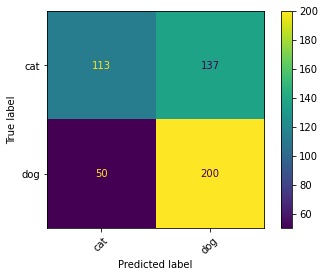

In [70]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                         display_labels=knn.classes_)

conf_mat_display.plot()
plt.xticks(rotation=45)
plt.show()